# クラスタリング(2) : k-means法

代表的なクラスタリングアルゴリズムである k-means法について学ぼう．

[前回](https://bit.ly/2SiYtqt)は，Iris（あやめ）のデータベースから4次元の特徴量を持つデータに対してクラスタリングを行ったが，ここでは k-means法の挙動がわかりやすいように，2次元の特徴量を持つデータを人工的に作って作業を行おう．

このような目的に適したデータを生成するために便利なライブラリも sklearn に用意されている．

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 150,
                  n_features = 2,  # 特徴量の個数．ここは固定．
                  centers = 3,
                  cluster_std = 0.8,
                  shuffle = True,
                  random_state = 0)

`make_blobs` には様々なオプション引数があるので，あとで色々と変化させながら試してみよう．ただし，以下は可視化に適した2次元のデータを対象とするので，`n_features = 2` は固定しておこう．それ以外は自由に変えてみましょう．

In [ ]:
print(X)

[[ 2.9349952   1.42187464]
 [ 0.26604148  2.71915015]
 [ 0.69794036  4.4288665 ]
 [ 0.25989683  4.61330933]
 [ 2.95657626  0.03371845]
 [ 1.96050262  5.26569121]
 [ 2.20249345  5.47927434]
 [ 2.56737274 -0.39590118]
 [-2.47799142  2.51242918]
 [ 2.16687183  5.82049867]
 [ 3.78585628  1.96688602]
 [ 0.31622934  2.0698696 ]
 [-2.03685363  2.60006481]
 [ 0.56854833  3.95332789]
 [-0.3278886   4.67401313]
 [-2.28246102  2.58984251]
 [-1.44872404  3.38424521]
 [ 1.75992205  0.70616032]
 [-1.63320848  2.67964956]
 [ 2.02384127 -0.03681114]
 [ 0.43830172  4.0161448 ]
 [ 2.67269996  1.55646698]
 [ 1.22672424  3.62051074]
 [ 1.09150494  5.46720613]
 [-1.11005211  2.45725189]
 [ 2.47388885  0.76042659]
 [ 2.54653102  1.635429  ]
 [ 1.34880003  3.07479238]
 [-3.15145159  4.56947655]
 [ 1.1372926   0.54740762]
 [-1.63566377  3.82739535]
 [-2.00475687  2.72754488]
 [-0.89784164  2.54474698]
 [-1.89778079  3.30306744]
 [-0.02596621  4.92577961]
 [ 1.46361712  2.13207534]
 [ 3.54931469  1.62249939]
 

In [ ]:
print(y)

[1 0 0 0 1 0 0 1 2 0 1 2 2 0 0 2 2 1 2 1 0 1 0 0 2 1 1 0 2 1 2 2 2 2 0 1 1
 1 0 0 2 2 0 1 1 1 2 0 2 0 1 0 0 1 1 2 0 1 2 0 2 2 2 2 0 2 0 1 0 0 0 1 1 0
 1 0 0 2 2 0 1 1 0 0 1 1 1 2 2 1 1 0 1 0 1 0 2 2 1 1 1 1 2 1 1 0 2 0 0 0 2
 0 1 2 0 2 0 0 2 2 0 1 0 0 1 1 2 1 2 2 2 2 1 2 2 2 0 2 1 2 0 0 1 1 2 2 2 2
 1 1]


クラスタリングは「**教師なし学習**」のアルゴリズムであるため，クラスラベル y は使わない．（ただし，以下の例で見るように，sklearn の学習アルゴリズムにおいては，教師あり学習のアルゴリズムのインターフェースと揃えるために (X, y) を引数に指定することが多い）

### 練習課題




*  上の実験において，データの発生のさせ方（`make_blob`) を変化させたり，`KMeans`のオプション引数を変化させたりして，挙動を確かめよう．
  * n_clusters を変化させてみよう．
  * verbose = 1 を指定すると，アルゴリズムの実行過程を少し詳しく表示してくれる．

*  【中級者向き】2次元のデータに対して，k-means法を実装してみよう．k-近傍法のプログラムが参考になるかもしれない．
    * 参考情報：「実践 機械学習1：k近傍法」[k_nearest_nei001](https://bit.ly/2BmAwJw) と [説明動画](https://drive.google.com/open?id=1-_9aHvJR-bxtRwpacgc5jCdXHXvJbRg-&authuser=1)，[解答例](https://bit.ly/3dVqNYr)

このとき，sklearn.KMeans のインターフェースに合わせて実装しておけば，後々の処理に便利である．次のテンプレートが役に立つかも知れません．



### k-means cluster の実装


$k$ means clustering の実装の説明

---





1.   各クラスターの `self.labels_`が変化しなくなるまで、もしくは `counter` が `self.max_iter_`に達するまで、クラスターを更新し続ける. (Line 30 以降の while文を参照) 
2.   クラスターを更新するという意味は、1) 初めに適当に、Xを適当に`self.n_cluster`分に振り分ける. 2) 振り分けたクラスターの重心を求める. 3) どのクラスターの重心に一番近いのかを基に、クラスターのラベルを貼り直す. という意味である. 
3. 初めに、元のデータ (X) を、`self.n_cluster`分に分割するのは、line 22, 23 を参照されたい. 初めに、`list (range(0, self.n_cluster))`の反復列で構成される列 cycle を生成して、これを `np.random.permutation`を用いてランダムに並び替える. この並び替えられた列を、初期のクラスターラベルとしている. 



In [ ]:
cycle = [0, 1, 2, 3, 2, 3]
cycle = np.random.permutation(cycle)
cycle

array([2, 3, 1, 2, 0, 3])

In [ ]:
import numpy as np
from statistics import mean
from sklearn.base import BaseEstimator, ClusterMixin
import sys, math, copy 

class KMeans2D(BaseEstimator, ClusterMixin):
    """
    2次元のデータに特化して，sklearn のインターフェースに沿いながらk-means法を実装するためのテンプレート．
    """
    
    def __init__(self, n_clusters=3, n_init=1, max_iter = 300):
        "必要な初期化をここで行う．オプション引数も，必要に応じて追加していくとよいでしょう．"
        self.n_clusters = n_clusters
        self.n_init = n_init 
        self.max_iter = max_iter

        
    def fit(self, X, y=None):
        """クラスタリングの本体を記述する部分．なお，y は無視する．
        この fit さえ自分で記述すれば，ClusterMixin機能により，fit_predict(X) も自動的に動作するようになります．"""  

        #変数設定
        cycle = np.tile(list(range(self.n_clusters)), int (X.shape[0]/self.n_clusters)) 
        inertia_ = 100000 #これぐらい大きい値で初期化しておく. 
        # list(range(0, self.n_clusters))を X.shape[0]/self.n_clusters分反復する. 
        # しかし、X.shape[0]が、いつもself.n_clustersで割れるか分からないので、割れなかった場合は、適当に要素を追加する. 
        while len(cycle) < X.shape[0]: #cycleの要素数が、X.shape[0]に達するまで、要素を適当に追加している. 
            cycle = np.append(cycle, np.random.randint(0, self.n_clusters))

        #ここから、クラスタリングのアルゴリズム
        for N in range(self.n_init): #n_initで指定した回数だけ、初期クラスターを変えてみて、一番小さい、inertiaを返すラベルを最終的な labels_に指定する. 
            labels_ = np.random.permutation(cycle) # cycleをランダムにシャッフルして、3つのクラスターラベルを生成. このシャッフルを指定の回数繰り返して、一番良いineriaが出る初期ラベルを選択する. 
            label_prev = np.zeros(X.shape[0], dtype=np.int)
            iter_ = 0
            counter = 0 
            while (not (labels_ == label_prev).all() and counter < self.max_iter): #クラスターが変化しなくなった場合、もしくは、指定の回数(max_iter)に達した場合、操作を終了する. 
                centroid = [False]*self.n_clusters
                for n in range(self.n_clusters): 
                    if not (labels_ == n).any() : #特定のクラスターが空集合の場合、その重心と最も遠い距離にあるデータの座標を新しい重心として設定する. 
                        d = [self._distance(centroid[n], X[i]) for i in range(X.shape[0])] 
                        centroid[n] = X[np.argmax(d)] #距離が最大になるインデックスのデータに貼りかえる. 
                    # 3つのクラスターの重心を求める
                    if type (centroid[n]) == bool: #以下は、空集合でないクラスターの重心座標に対しての操作
                        XX = X[labels_ == n]  #各クラスターの座標 
                        centroid[n] = [mean(XX[:, k]) for k in range(X.shape[1])] #クラスターの重心座標
                label_prev = copy.deepcopy(labels_) # label_prev を更新
                for j in range(X.shape[0]): # ラベルの貼り直し
                    dist_list = [self._distance(X[j], centroid[k]) for k in range(self.n_clusters)]
                    labels_[j] = np.argmin(dist_list)
                counter += 1
            
            #inertia の計算
            norm_square = 0 
            for n in range(self.n_clusters):
                X_X = X[labels_==n]
                for i in range(X_X.shape[0]): 
                    norm_square = norm_square + (self._distance(X_X[i], centroid[n]))**2

            centroid = np.array(centroid)
            iter_ = counter
            if norm_square < inertia_: #inertiaが最小の時の、labels_, inertia_, cluster_centers_, iter_を返す. 
                inertia_ = copy.deepcopy(norm_square)
                self.labels_ = labels_
                self.inertia_ = inertia_
                self.cluster_centers_ = centroid
                self.iter_ = iter_

        return self

    # k-近傍法のアルゴリズムとも類似点があるので，そのとき作ったこの関数も役に立つかも知れません．
    def _distance(self, p, q):
        """点 p と q の間のユークリッド距離を計算して返す．
        まずは2次元に特化して実装してみる．"""
        return math.sqrt( (p[0] - q[0])**2 + (p[1] - q[1])**2 )


In [ ]:
km = KMeans2D(n_clusters=3, n_init=3)
km.fit(X)

KMeans2D(max_iter=300, n_clusters=3, n_init=3)

In [ ]:
km.fit_predict(X)

array([2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2,
       2, 2, 0, 2, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2])

各クラスターのラベル`y_km`及び、根拠となる重心座標`cluster_centers`、各クラスター重心からの距離の二乗である`inertia`を表示してみる. 

In [ ]:
print('cluster label :', km.labels_)
print()
print('cluster_center :', km.cluster_centers_)
print()
print('inertia :', km.inertia_)

cluster label : [2 1 1 1 2 1 1 2 0 1 2 2 0 1 1 0 0 2 0 2 1 2 1 1 0 2 2 1 0 2 0 0 0 0 1 2 2
 2 1 1 0 0 1 2 2 2 0 2 0 1 2 1 1 2 2 0 1 2 0 1 0 1 0 0 1 1 1 2 1 1 1 2 2 1
 2 1 1 0 0 1 2 2 1 1 2 2 2 0 0 2 2 1 2 1 2 1 0 0 2 2 2 2 0 2 2 1 0 1 1 1 0
 1 2 0 1 0 1 1 0 0 1 2 1 1 2 2 0 2 0 0 0 0 2 0 0 0 1 0 2 0 1 1 2 2 0 0 0 0
 2 2]

cluster_center : [[-1.75331622  2.9376426 ]
 [ 0.84069413  4.35679782]
 [ 2.05130138  1.06134965]]

inertia : 182.24830062439057


最終的なクラスター分析の回数 `actual_iter`を表示してみる. 

In [ ]:
print('final iteration is :', km.iter_)

final iteration is : 8


クラスター分析の結果を元のデータの正解ラベルとともに描写してみる. その時、各クラスターの中心をXで表す. 

In [ ]:
import matplotlib.pyplot as plt 

def cluster_visualize(n , X): 
    # n=3でうまくいくようになっている. 
    color_list = ['lightgreen', 'orange', 'lightblue']
    marker_list = ['o', '^', 'v']
    y_km = km.labels_
    cluster_centers = km.cluster_centers_

    plt.figure(figsize=(15, 5))

    #クラスターの描写
    plt.subplot(121)
    for i in range(n):
        plt.scatter(X[y_km==i, 0], X[y_km==i, 1], s=30, c=color_list[i], marker=marker_list[i], label=f'cluster{i+1}')

    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)
    plt.title(f'K-Means Clustering Label : iteration = {km.iter_}')
    plt.legend()
    plt.grid()

    #元のデータのラベルを描写
    plt.subplot(122)
    for i in range(n):
        plt.scatter(X[y==i, 0], X[y==i, 1], s=30, c=color_list[i], marker=marker_list[i], label=f'label{i}')
    plt.title('Actual Label')
    plt.legend()
    plt.grid()
    plt.show()

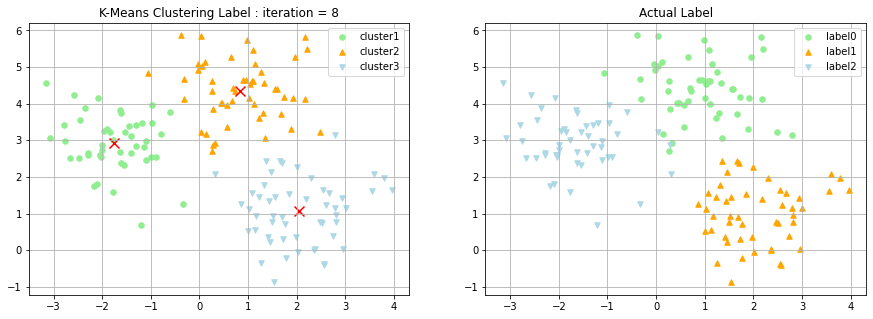

In [ ]:
cluster_visualize(n=3, X=X)

クラスターの数を、変化させてみる. 試しに、n = 5に指定してみる. 

In [ ]:
km2 = KMeans2D(n_clusters=5, n_init=5).fit(X)

In [ ]:
y_km2 = km2.labels_
cluster_centers2 = km2.cluster_centers_

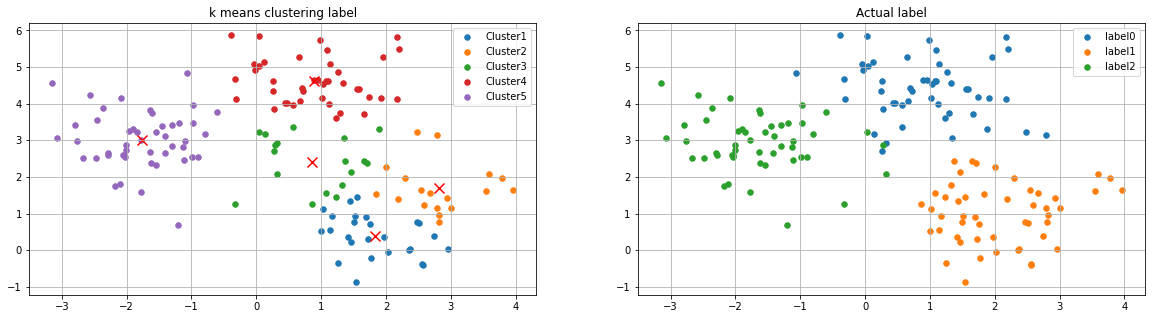

In [ ]:
n = 5 

plt.figure(figsize=(20, 5))
plt.subplot(121)
for i in range(5): 
    plt.scatter(X[y_km2 == i, 0], X[y_km2==i, 1], s=30, label=f'Cluster{i+1}')
plt.scatter(cluster_centers2[:, 0], cluster_centers2[:, 1], marker='x', c='red', s=100)
plt.title('k means clustering label')
plt.legend()
plt.grid()

n_feature = 3
plt.subplot(122)
for i in range(n_feature): 
    plt.scatter(X[y==i, 0], X[y==i, 1], s=30, label=f'label{i}')
plt.title('Actual label')
plt.legend()
plt.grid()
plt.show()

### Irisデータのクラスタリング

【練習問題の続き】
*  【中～上級者向き】numpy の機能をうまく利用して，k-means 法を実装してみよう．そうすれば2次元以上のデータに対する拡張が容易に，かつ効率よく行えるようになるだろう．


irisデータ(4次元の特徴量を持つ)で自作の k-means clustering を試してみる. 

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

In [ ]:
km = KMeans2D(n_clusters=3, n_init=5)
km.fit(X_iris)

KMeans2D(max_iter=300, n_clusters=3, n_init=5)

In [ ]:
print('iris_cluster label', km.labels_)
print('iris_cluster center', km.cluster_centers_)
print('iris_cluster iteration', km.iter_)

iris_cluster label [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
iris_cluster center [[5.006      3.428      1.462      0.246     ]
 [6.81276596 3.07446809 5.49574468 1.94893617]
 [5.77358491 2.69245283 4.38301887 1.43396226]]
iris_cluster iteration 14


In [ ]:
ykm_iris = km.labels_
iris_cluster_center = km.cluster_centers_

Iris データの特徴量を任意に2つ選んで、描写してみる. 左が、クラスタリングの結果で、右が実データの正解ラベルです. 

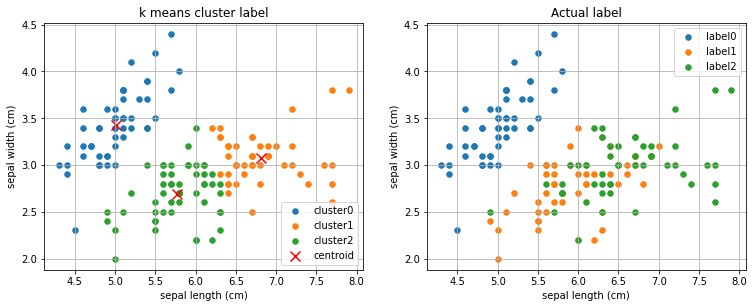

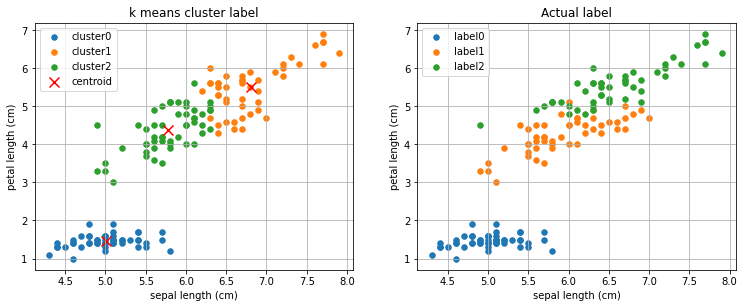

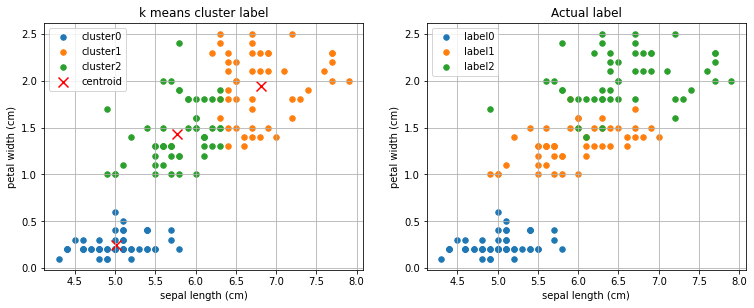

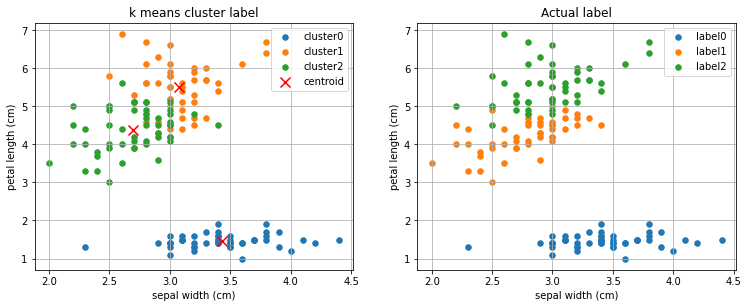

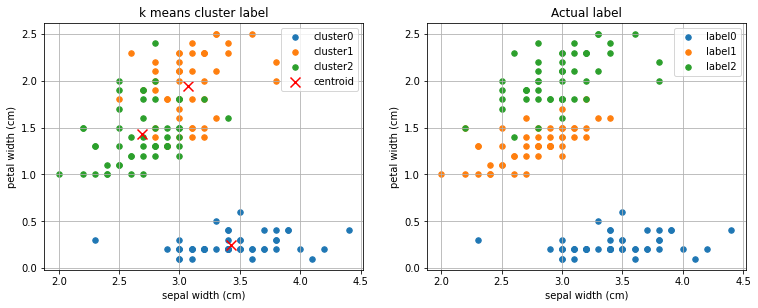

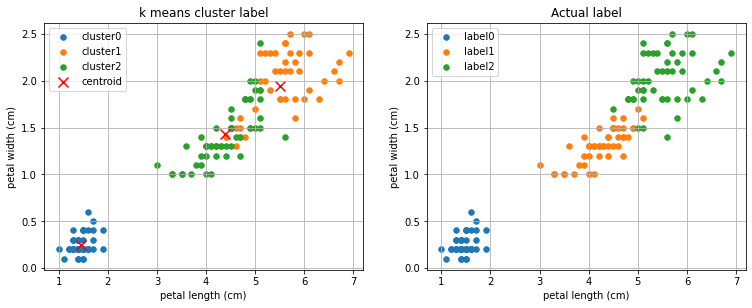

In [ ]:
from itertools import combinations
comb = list (combinations([0, 1, 2, 3], 2))

for i in range(len(comb)): 
    a = comb[i][0] #1つ目の特徴量
    b = comb[i][1] #2つ目の特徴量
    plt.figure(figsize=(40, 10)) 
    plt.subplot(2, 6, 2*(i+1)-1)
    for k in range(len(iris.target_names)): 
        plt.scatter(X_iris[ykm_iris == k, a], X_iris[ykm_iris == k, b], label = f'cluster{k}', s = 30)
        plt.xlabel(iris.feature_names[a])
        plt.ylabel(iris.feature_names[b])
        plt.title('k means cluster label')
        plt.legend()
    plt.scatter(iris_cluster_center[:, a], iris_cluster_center[:, b], label = 'centroid', c = 'red', marker='x', s=100)
    plt.xlabel(iris.feature_names[a])
    plt.ylabel(iris.feature_names[b])
    plt.title('k means cluster label')
    plt.legend()
    plt.grid()

    plt.subplot(2, 6, 2*(i+1))
    for k in range(len(iris.target_names)): 
        plt.scatter(X_iris[y_iris == k, a], X_iris[y_iris == k, b], label = f'label{k}', s = 30)
        plt.legend()
    plt.xlabel(iris.feature_names[a])
    plt.ylabel(iris.feature_names[b])
    plt.title('Actual label')
    plt.grid()
    

大体いい感じであったっていることが分かる. しかし、両方のラベルにともに近いデータのクラスタリングは多少の間違いが見られる. 

### k-means++ を用いて、クラスタリングの初期ラベル（ランダムに設定されたクラスター中心に大きく依存するという k-means clustering の問題点）を改善する. 

k-means++のアルゴリズム:

1. データポイント(ここでは、X）からランダムに1つ点を選択し、これを1つ目のクラスター中心とする. 

2. 各データポイント $x_i$ と最近傍中心との距離の二乗 $d(x_i)^2$ を計算する. 

3. 2で求めた $d(x_i)$ が一番大きくなる点を2つ目のクラスター中心とする.　最近傍中心とは、データ $x_i$に最も近いクラスター中心のことである. 初めは、1つ目のクラスター中心のことを指す. 

4. クラスター中心の数が、`self.n_clusters`に達するまで、2と3を繰り返す. 

なお、このアルゴリズム作成の際には、https://www.geeksforgeeks.org/ml-k-means-algorithm/ を参考にした. また、$d(x_i)^2$ではなく、$\frac{d(x_i)^2} {\sum_{i=1}^{N} d(x_i)^2}$の確立分布を基に、クラスター中心を決める、としているサイト（https://qiita.com/NoriakiOshita/items/cbd46d907d196efe64a3 ）もあったが、本質的には同じことなので、今回は2の方針で初期クラスター中心を決定する. 

In [ ]:
import numpy as np
from statistics import mean
from sklearn.base import BaseEstimator, ClusterMixin
import sys, math, copy 

class KMeans_plus_plus(BaseEstimator, ClusterMixin):
    """
    2次元のデータに特化して，sklearn のインターフェースに沿いながらk-means法を実装するためのテンプレート．
    """
    
    def __init__(self, n_clusters=3, n_init=1, max_iter = 300):
        "必要な初期化をここで行う．オプション引数も，必要に応じて追加していくとよいでしょう．"
        self.n_clusters = n_clusters
        self.n_init = n_init 
        self.max_iter = max_iter

        
    def fit(self, X, y=None):
        """クラスタリングの本体を記述する部分．なお，y は無視する．
        この fit さえ自分で記述すれば，ClusterMixin機能により，fit_predict(X) も自動的に動作するようになります．"""  

        #変数設定
        inertia_ = 100000 #これぐらい大きい値で初期化しておく. 

        #ここから、クラスタリングのアルゴリズム
        for N in range(self.n_init): #n_initで指定した回数だけ、初期クラスターを変えてみて、一番小さい、inertiaを返すラベルを最終的な labels_に指定する.
            ####これが、k-means++での変更点####
            first_centroid = X[np.random.randint(0, X.shape[0])] #1番の操作 ここだけ、乱数が絡む. 
            #2乗距離になっていたが、距離でも本質的に変わらない. 
            # print(first_centroid) #debag 
            first_centroid = np.vstack([first_centroid, X[np.argmax([self._distance(first_centroid, x) for x in X])]]) #2, 3番の操作
            # print(first_centroid) #debag
            while first_centroid.shape[0] < self.n_clusters : #4番の操作
                nearest_center = np.zeros(X.shape[0], dtype=np.int)
                for n in range(X.shape[0]):
                    #各データの際近傍中心の抽出
                    nearest_center[n] = np.argmin([self._distance(X[n], first_centroid[i]) for i in range(first_centroid.shape[0])]) 
                first_centroid = np.vstack([first_centroid, X[np.argmax([self._distance(first_centroid[nearest_center[i]], X[i]) for i in range(X.shape[0])])]])
            centroid = copy.deepcopy(first_centroid)
            # print(nearest_center) #debag
            # print(centroid) #debag

            labels_ = np.zeros(X.shape[0])
            for i in range(X.shape[0]): 
                labels_[i] = np.argmin([self._distance(X[i], x) for x in centroid])
            label_prev = np.zeros(X.shape[0], dtype=np.int)
            ########
            iter_ = 0
            counter = 0 
            while (not (labels_ == label_prev).all() and counter < self.max_iter): #クラスターが変化しなくなった場合、もしくは、指定の回数(max_iter)に達した場合、操作を終了する. 
                centroid = [False]*self.n_clusters
                for n in range(self.n_clusters): 
                    if not (labels_ == n).any() : #特定のクラスターが空集合の場合、その重心と最も遠い距離にあるデータの座標を新しい重心として設定する. 
                        dist = [self._distance(centroid[n], X[i]) for i in range(X.shape[0])] 
                        centroid[n] = X[np.argmax(dist)] #距離が最大になるインデックスのデータに貼りかえる. 
                    # 3つのクラスターの重心を求める
                    if type (centroid[n]) == bool: #以下は、空集合でないクラスターの重心座標に対しての操作
                        XX = X[labels_ == n]  #各クラスターの座標 
                        centroid[n] = [mean(XX[:, k]) for k in range(X.shape[1])] #クラスターの重心座標
                label_prev = copy.deepcopy(labels_) # label_prev を更新
                for j in range(X.shape[0]): # ラベルの貼り直し
                    dist = [self._distance(X[j], centroid[k]) for k in range(self.n_clusters)]
                    labels_[j] = np.argmin(dist)
                counter += 1
            
            #inertia の計算
            norm_square = 0 
            for n in range(self.n_clusters):
                X_X = X[labels_==n]
                for i in range(X_X.shape[0]): 
                    norm_square = norm_square + (self._distance(X_X[i], centroid[n]))**2

            centroid = np.array(centroid)
            iter_ = counter
            if norm_square < inertia_: #inertiaが最小の時の、labels_, inertia_, cluster_centers_, iter_を返す. 
                inertia_ = copy.deepcopy(norm_square)
                self.labels_ = labels_
                self.inertia_ = inertia_
                self.cluster_centers_ = centroid
                self.iter_ = iter_

        return self

    # k-近傍法のアルゴリズムとも類似点があるので，そのとき作ったこの関数も役に立つかも知れません．
    def _distance(self, p, q):
        """点 p と q の間のユークリッド距離を計算して返す．"""
        return math.sqrt( (p[0] - q[0])**2 + (p[1] - q[1])**2 )

In [ ]:
a = np.array([1, 2, 3, 4])
b = np.array([3, 1, 5, 2])
np.linalg.norm(a-b)

3.605551275463989

In [ ]:
km = KMeans_plus_plus(n_clusters=3, n_init=5)

In [ ]:
km.fit(X)

KMeans_plus_plus(max_iter=300, n_clusters=3, n_init=5)

各クラスターのラベル`y_km`及び、根拠となる重心座標`cluster_centers`、各クラスター重心からの距離の二乗である`inertia`を表示してみる. 

In [ ]:
print('cluster label :', km.labels_)
print()
print('cluster_center :', km.cluster_centers_)
print()
print('inertia :', km.inertia_)

cluster label : [1. 0. 0. 0. 1. 0. 0. 1. 2. 0. 1. 1. 2. 0. 0. 2. 2. 1. 2. 1. 0. 1. 0. 0.
 2. 1. 1. 0. 2. 1. 2. 2. 2. 2. 0. 1. 1. 1. 0. 0. 2. 2. 0. 1. 1. 1. 2. 1.
 2. 0. 1. 0. 0. 1. 1. 2. 0. 1. 2. 0. 2. 0. 2. 2. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 2. 2. 0. 1. 1. 0. 0. 1. 1. 1. 2. 2. 1. 1. 0. 1. 0. 1. 0.
 2. 2. 1. 1. 1. 1. 2. 1. 1. 0. 2. 0. 0. 0. 2. 0. 1. 2. 0. 2. 0. 0. 2. 2.
 0. 1. 0. 0. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 0. 2. 1. 2. 0. 0. 1. 1.
 2. 2. 2. 2. 1. 1.]

cluster_center : [[ 0.84069413  4.35679782]
 [ 2.05130138  1.06134965]
 [-1.75331622  2.9376426 ]]

inertia : 182.24830062439065


最終的なクラスター分析の回数 `actual_iter`を表示してみる. 

In [ ]:
print('final iteration is :', km.iter_)

final iteration is : 3


クラスター分析の結果を元のデータの正解ラベルとともに描写してみる. その時、各クラスターの中心をXで表す. 

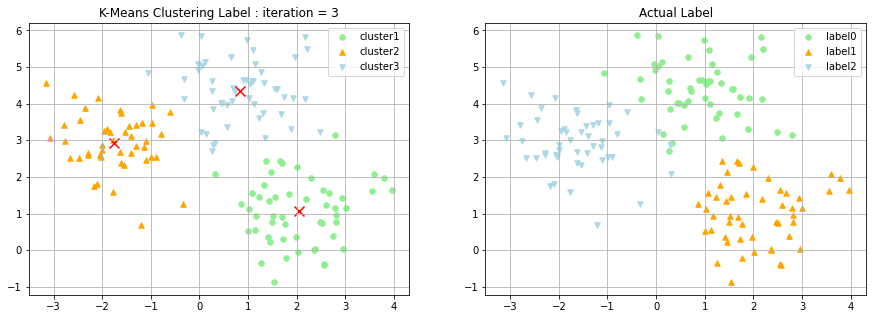

In [ ]:
cluster_visualize(n=3, X=X)

## 画像の量子化 (Quantization) 

参考資料 

https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py

Automatically created module for IPython interactive environment
Fitting model on a small sub-sample of the data
done in 0.412s.
Predicting color indices on the full image (k-means)
done in 0.241s.
Predicting color indices on the full image (random)
done in 0.220s.


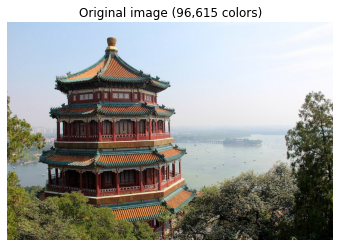

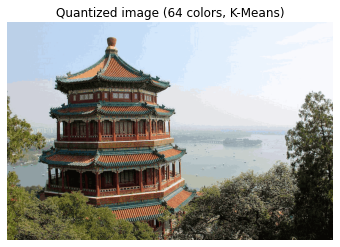

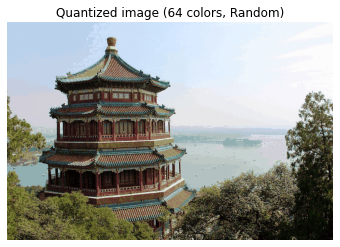

In [ ]:
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#
# License: BSD 3 clause

print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 64

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()